In [1]:
# importando as bibliotecas e classes
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

In [2]:
#Dados treinos    
dados_treinos = pd.read_csv("novodataframe.csv")

In [3]:
dados_treinos.head()

,Ano/Estados,AM - QTD QUEIMADAS,MA - QTD QUEIMADAS,AC - QTD QUEIMADAS,AP - QTD QUEIMADAS,MT - QTD QUEIMADAS,PA - QTD QUEIMADAS,RO - QTD QUEIMADAS,RR - QTD QUEIMADAS,TO - QTD QUEIMADAS,AC - Desmatamento,AM - Desmatamento,AP - Desmatamento,MA - Desmatamento,MT - Desmatamento,PA - Desmatamento,RO - Desmatamento,RR - Desmatamento,TO - Desmatamento,AMZ LEGAL - Desmatamento
0,2004,8083.0,11443.0,7271.0,3413.0,70422.0,74214.0,40824.0,2221.0,746.0,728.0,1232.0,46.0,755.0,11814.0,8870.0,3858.0,311.0,158.0,27772.0
1,2005,15644.0,10820.0,15993.0,2020.0,53489.0,71477.0,41641.0,1461.0,1175.0,592.0,775.0,33.0,922.0,7145.0,5899.0,3244.0,133.0,271.0,19014.0
2,2006,11697.0,7885.0,6198.0,1665.0,32745.0,55840.0,25699.0,2189.0,504.0,398.0,788.0,30.0,674.0,4333.0,5659.0,2049.0,231.0,124.0,14286.0
3,2007,11293.0,12329.0,8549.0,1484.0,52399.0,68491.0,27477.0,3244.0,1214.0,184.0,610.0,39.0,631.0,2678.0,5526.0,1611.0,309.0,63.0,11651.0
4,2008,6701.0,7822.0,5699.0,2153.0,18602.0,48449.0,11549.0,1950.0,528.0,254.0,604.0,100.0,1271.0,3258.0,5607.0,1136.0,574.0,107.0,12911.0


In [4]:
#Criar um novo dataframe para AM
treinos_cols = ['Ano/Estados','AM - QTD QUEIMADAS']
treinos_dados_AM = dados_treinos[treinos_cols]

In [5]:
treinos_dados_AM

,Ano/Estados,AM - QTD QUEIMADAS
0,2004,8083.0
1,2005,15644.0
2,2006,11697.0
3,2007,11293.0
4,2008,6701.0
5,2009,9280.0
6,2010,12139.0
7,2011,5028.0
8,2012,9114.0
9,2013,6512.0


In [ ]:
#Criar index
#treinos_dados_AM.set_index('Ano/Estados',inplace = True)

In [6]:
#Criar coluna com sigla
treinos_dados_AM['SIGLA']="AM"

C:\Users\alyne\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
#Dataframe criado para AM
treinos_dados_AM

,Ano/Estados,AM - QTD QUEIMADAS,SIGLA
0,2004,8083.0,AM
1,2005,15644.0,AM
2,2006,11697.0,AM
3,2007,11293.0,AM
4,2008,6701.0,AM
5,2009,9280.0,AM
6,2010,12139.0,AM
7,2011,5028.0,AM
8,2012,9114.0,AM
9,2013,6512.0,AM


In [8]:
treinos_dados_AM= treinos_dados_AM.rename(columns= {'AM - QTD QUEIMADAS':'Qtd. Queimadas'})

In [9]:
treinos_dados_AM

,Ano/Estados,Qtd. Queimadas,SIGLA
0,2004,8083.0,AM
1,2005,15644.0,AM
2,2006,11697.0,AM
3,2007,11293.0,AM
4,2008,6701.0,AM
5,2009,9280.0,AM
6,2010,12139.0,AM
7,2011,5028.0,AM
8,2012,9114.0,AM
9,2013,6512.0,AM


In [10]:
#Dividir entre treino (2000 até 2010) e teste (2011 até 2019)
treino = treinos_dados_AM.loc[treinos_dados_AM['Ano/Estados'] <= 2010]
teste = treinos_dados_AM.loc[treinos_dados_AM['Ano/Estados'] > 2010]
#treino = treinos_dados_AM.loc[[2004,2005,2006,2007,2008,2009,2010]]
#teste = treinos_dados_AM.loc[[2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]]


In [ ]:
treino

In [ ]:
teste

In [11]:
#buscar correlações
print(treino.corr())

                Ano/Estados  Qtd. Queimadas
Ano/Estados        1.000000       -0.144614
Qtd. Queimadas    -0.144614        1.000000


In [12]:
LE = LabelEncoder()

In [39]:
#Dados de Treino
#features    
#x_train = treino.drop(['Ano/Estados'],axis=1)
x_train = treino[{'Ano/Estados'}].copy()
#variáveis resposta
y_train = treino['Qtd. Queimadas'].copy()

In [41]:
#x_train['SIGLA'] = LE.fit_transform(x_train['SIGLA'])
#x_train['SIGLA'] = LE.fit_transform(x_train['SIGLA'].astype(str))

In [42]:
x_train

,Ano/Estados
0,2004
1,2005
2,2006
3,2007
4,2008
5,2009
6,2010


In [44]:
#x_train = x_train[["Ano/Estados", "SIGLA"]]

In [45]:
y_train

0     8083.0
1    15644.0
2    11697.0
3    11293.0
4     6701.0
5     9280.0
6    12139.0
Name: Qtd. Queimadas, dtype: float64

In [46]:
#Teste
x_teste = teste['Qtd. Queimadas'].copy()

In [47]:
x_train.shape

(7, 1)

In [48]:
y_train.shape

(7,)

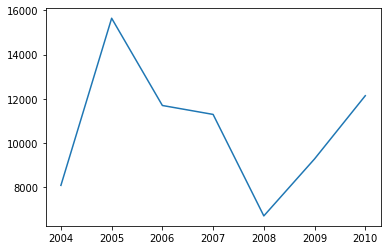

In [50]:
plt.plot(x_train, y_train)

In [51]:
#Criar o modelo
lin_reg = LinearRegression(normalize = True)
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [52]:
#Ver o score
print(lin_reg.score(x_train,y_train))

0.020913353595681583
